## Linear regression for prediction target values using Pytorch

### (1) Gachon Company’s Recruitment Dataset 
- This dataset was prepared for multiple linear regression and serves as the main dataset for this report. It contains 4 features: GPA, TOEIC, Award, and Etc. The target variable is TOTAL, and considering that each feature has its corresponding weight and a bias is added, the goal is to calculate a total of 5 parameters.

In [28]:
import pandas as pd
import numpy as np
import torch
import torch.optim as optim
import matplotlib.pyplot as plt


> 0.1^1 100
> 0.1^1 200
> 0.1^1 500
> 0.1^1 1000
> 0.1^1 5000
> 0.1^2 100
> 0.1^2 200
> 0.1^2 500
> 0.1^2 1000
> 0.1^2 5000
> 0.1^3 100
> 0.1^3 200
> 0.1^3 500
> 0.1^3 1000
> 0.1^3 5000
> 0.1^4 100
> 0.1^4 200
> 0.1^4 500
> 0.1^4 1000
> 0.1^4 5000
> 0.1^5 100
> 0.1^5 200
> 0.1^5 500
> 0.1^5 1000
> 0.1^5 5000
> 0.1^6 100
> 0.1^6 200
> 0.1^6 500
> 0.1^6 1000
> 0.1^6 5000
> 0.1^7 100
> 0.1^7 200
> 0.1^7 500
> 0.1^7 1000
> 0.1^7 5000
> 0.1^8 100
> 0.1^8 200
> 0.1^8 500
> 0.1^8 1000
> 0.1^8 5000
> 0.1^9 100
> 0.1^9 200
> 0.1^9 500
> 0.1^9 1000
> 0.1^9 5000
> 0.1^10 100
> 0.1^10 200
> 0.1^10 500
> 0.1^10 1000
> 0.1^10 5000


lr    ep                      w_values  b_value  \
0    0.1^6   100  [0.001, 0.095, 0.072, 0.038]    0.001   
1    0.1^6   200  [0.002, 0.089, 0.124, 0.066]    0.001   
2    0.1^6   500  [0.004, 0.076, 0.236, 0.129]    0.002   
3    0.1^6  1000  [0.005, 0.065, 0.326, 0.188]    0.003   
4    0.1^6  5000  [0.007, 0.056, 0.374, 0.268]    0.005   
5    0.1^7   100  [0.001, 0.101, 0.015, 0.009]    0.000   
6    0.1^7   200    [0.001, 0.1, 0.022, 0.013]    0.000   
7    0.1^7   500  [0.001, 0.098, 0.041, 0.023]    0.000   
8    0.1^7  1000  [0.001, 0.095, 0.072, 0.038]    0.001   
9    0.1^7  5000  [0.004, 0.076, 0.236, 0.129]    0.002   
10   0.1^8   100    [0.0, 0.073, 0.007, 0.005]    0.000   
11   0.1^8   200    [0.0, 0.093, 0.009, 0.006]    0.000   
12   0.1^8   500  [0.001, 0.101, 0.012, 0.008]    0.000   
13   0.1^8  1000  [0.001, 0.101, 0.015, 0.009]    0.000   
14   0.1^8  5000  [0.001, 0.098, 0.041, 0.023]    0.000   
15   0.1^9   100    [0.0, 0.012, 0.001, 0.001]    0.000   
16   0.1^9   200    [0.0, 0.022, 0.002, 0.001]    0.000   
17   0.1^9   500    [0.0, 0.047, 0.004, 0.003]    0.000   
18   0.1^9  1000    [0.0, 0.073, 0.007, 0.005]    0.000   
19   0.1^9  5000  [0.001, 0.101, 0.012, 0.008]    0.000   
20  0.1^10   100        [0.0, 0.001, 0.0, 0.0]    0.000   
21  0.1^10   200        [0.0, 0.003, 0.0, 0.0]    0.000   
22  0.1^10   500      [0.0, 0.006, 0.001, 0.0]    0.000   
23  0.1^10  1000    [0.0, 0.012, 0.001, 0.001]    0.000   
24  0.1^10  5000    [0.0, 0.047, 0.004, 0.003]    0.000   

             calculated_w_values  calculated_b_value    costs  prediction  \
0   [1.268, 0.034, 0.361, 0.378]               8.299  169.328      74.967   
1   [1.268, 0.034, 0.361, 0.378]               8.299  133.138      77.169   
2   [1.268, 0.034, 0.361, 0.378]               8.299   76.959      81.964   
3   [1.268, 0.034, 0.361, 0.378]               8.299   51.708      86.240   
4   [1.268, 0.034, 0.361, 0.378]               8.299   45.568      90.653   
5   [1.268, 0.034, 0.361, 0.378]               8.299  214.198      72.645   
6   [1.268, 0.034, 0.361, 0.378]               8.299  208.441      72.920   
7   [1.268, 0.034, 0.361, 0.378]               8.299  192.332      73.719   
8   [1.268, 0.034, 0.361, 0.378]               8.299  168.976      74.965   
9   [1.268, 0.034, 0.361, 0.378]               8.299   76.905      81.960   
10  [1.268, 0.034, 0.361, 0.378]               8.299  761.647      51.805   
11  [1.268, 0.034, 0.361, 0.378]               8.299  262.781      66.564   
12  [1.268, 0.034, 0.361, 0.378]               8.299  217.123      72.371   
13  [1.268, 0.034, 0.361, 0.378]               8.299  214.145      72.645   
14  [1.268, 0.034, 0.361, 0.378]               8.299  192.289      73.719   
15  [1.268, 0.034, 0.361, 0.378]               8.299 5319.568       8.505   
16  [1.268, 0.034, 0.361, 0.378]               8.299 4191.569      16.012   
17  [1.268, 0.034, 0.361, 0.378]               8.299 2095.947      33.643   
18  [1.268, 0.034, 0.361, 0.378]               8.299  757.071      51.658   
19  [1.268, 0.034, 0.361, 0.378]               8.299  217.118      72.366   
20  [1.268, 0.034, 0.361, 0.378]               8.299 6591.980       0.899   
21  [1.268, 0.034, 0.361, 0.378]               8.299 6434.751       1.786   
22  [1.268, 0.034, 0.361, 0.378]               8.299 5985.958       4.383   
23  [1.268, 0.034, 0.361, 0.378]               8.299 5308.823       8.501   
24  [1.268, 0.034, 0.361, 0.378]               8.299 2093.048      33.629   

    calculated_prediction  prediction_diff  
0                  96.111           21.144  
1                  96.111           18.941  
2                  96.111           14.146  
3                  96.111            9.870  
4                  96.111            5.458  
5                  96.111           23.466  
6                  96.111           23.191  
7                  96.111           22.392  
8                  96.111           21.146  
9                  9

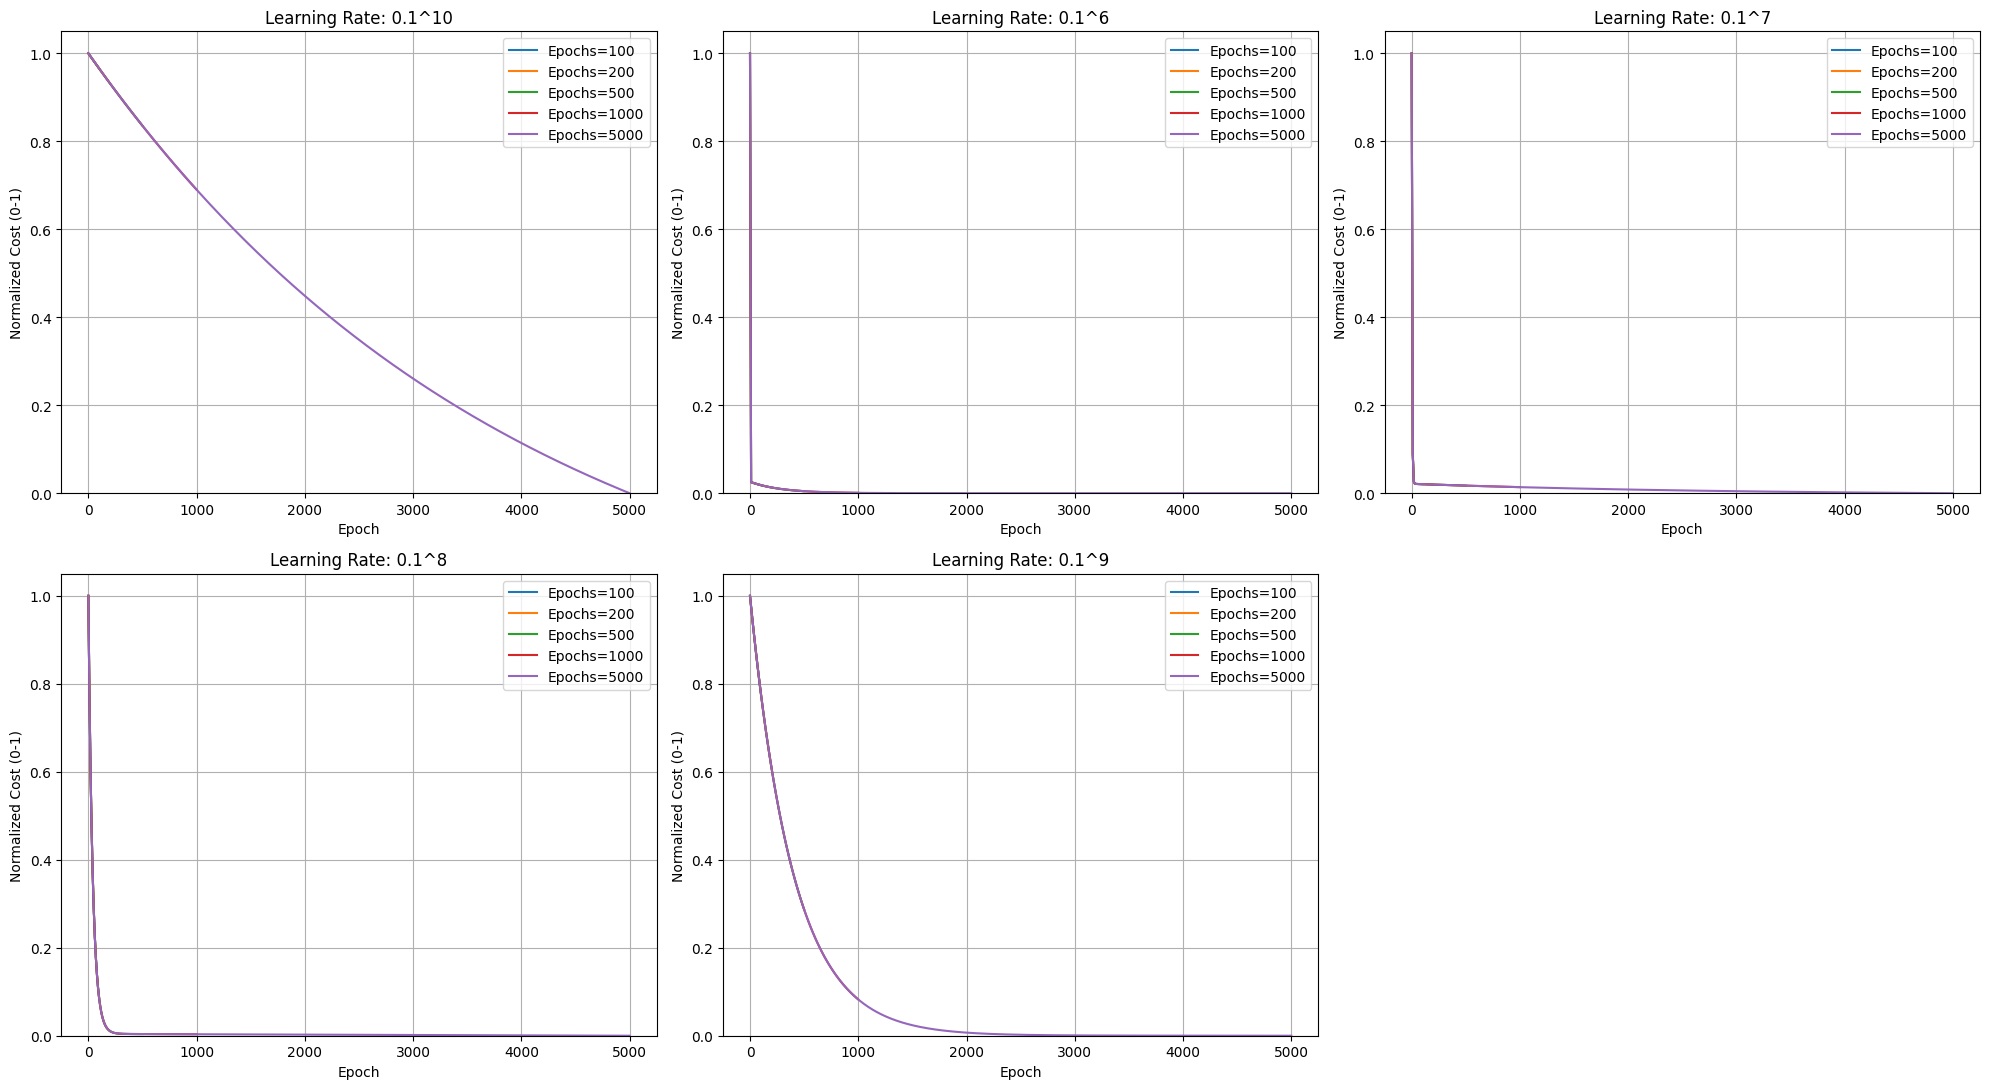

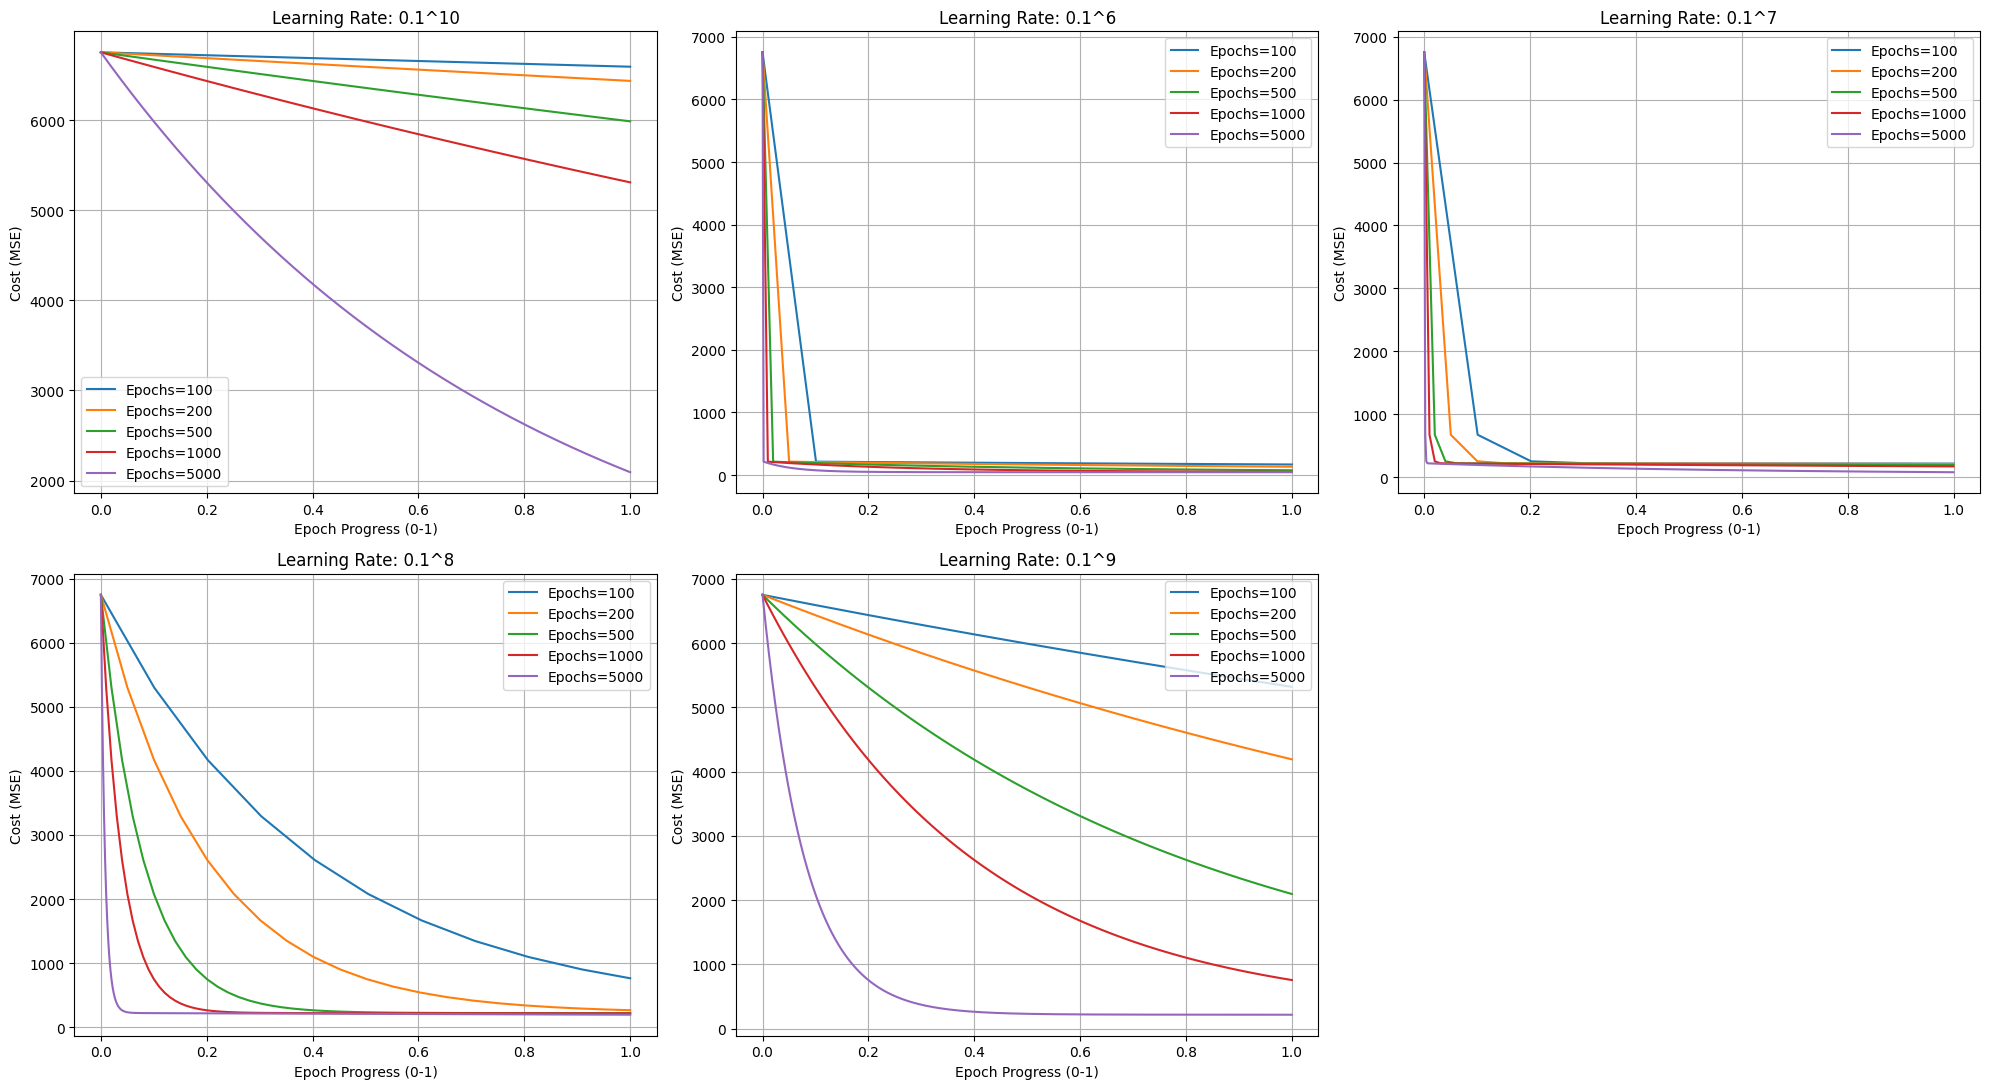

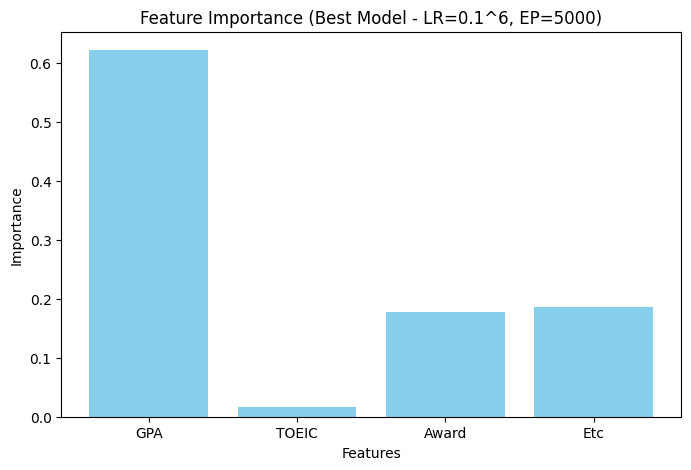

In [44]:
# Gachon Company's Recruitment Dataset
data = {
    'name': ['Kim', 'Lee', 'Park', 'Choi', 'Jung', 'Go', 'Woo', 'Min', 'Kang'],
    'GPA': [3.8, 3.2, 3.7, 4.2, 2.6, 3.4, 4.1, 3.3, 3.9],
    'TOEIC': [700, 650, 820, 830, 550, 910, 990, 870, 650],
    'Award': [80, 90, 70, 50, 90, 30, 70, 60, 80],
    'Etc': [50, 30, 40, 70, 60, 40, 20, 60, 50]
}

gpa_tensor = torch.FloatTensor(data['GPA'])
toeic_tensor = torch.FloatTensor(data['TOEIC'])
award_tensor = torch.FloatTensor(data['Award'])
etc_tensor = torch.FloatTensor(data['Etc'])

X_train = torch.FloatTensor([
    data['GPA'],
    data['TOEIC'],
    data['Award'],
    data['Etc']
])
y_train = torch.FloatTensor([85, 80, 78, 87, 85, 70, 81, 88, 84])
X_train_t = torch.transpose(X_train, 0, 1)

# Hyperparameters
learning_rates = [0.1 ** n for n in range(1, 11)]
num_epochs = [100, 200, 500, 1000, 5000]

# Store experiment results
experiment_results = []

# Store cost histories for plotting
cost_histories = {}

# Test data
test_data = np.array([3.3, 700, 77, 84])

# Run experiments
for i, lr in enumerate(learning_rates):
    lr_key = f'0.1^{i+1}'
    cost_histories[lr_key] = {}
    
    for ep in num_epochs:
        print(f'> {lr_key} {ep}')
        W = torch.zeros([4, 1], requires_grad=True)
        b = torch.zeros(1, requires_grad=True)
        
        optimizer = optim.SGD([W, b], lr=lr)  # Define optimizer (stochastic gradient descent)
        
        # Track costs during training for this configuration
        epoch_costs = []
        
        for epoch in range(ep):
            hypothesis = torch.matmul(X_train_t, W) + b  # Forward pass (prediction)
            cost = torch.mean((hypothesis - y_train) ** 2)  # MSE 
            
            optimizer.zero_grad()  # Zero gradients from previous step
            cost.backward()  # Compute gradients
            optimizer.step()  # Update parameters using gradients
            
            # Save cost every 10 epochs or for the last epoch
            if epoch % 10 == 0 or epoch == ep-1:
                current_cost = cost.item()
                # Only store if cost is not NaN, infinity, or extremely large
                if (not np.isnan(current_cost) and 
                    not np.isinf(current_cost) and 
                    current_cost < 1e20):  # Exclude extremely large values
                    epoch_costs.append((epoch, current_cost))
        
        # Only store cost history if it contains meaningful data
        if len(epoch_costs) > 0:
            # Check if there's actual variation in costs (learning is happening)
            _, costs = zip(*epoch_costs)
            if np.std(costs) > 1e-10:  # Only include if there's some variation
                cost_histories[lr_key][ep] = epoch_costs
        
        # Now calculate W and b using the normal equation
        X_np = X_train_t.numpy()  # Convert tensor to numpy for normal equation
        X_bias = np.c_[np.ones((X_np.shape[0], 1)), X_np]  # Add bias term (column of ones)
        y_np = y_train.numpy()
        
        # Normal equation for W: W = (X^T X)^-1 X^T Y
        X_transpose = X_bias.T
        W_calculated = np.linalg.inv(X_transpose.dot(X_bias)).dot(X_transpose).dot(y_np)
        
        # Extract the calculated W and b values
        calculated_w_values = W_calculated[1:]  # Extract weights (excluding bias term)
        calculated_b_value = W_calculated[0]  # Extract bias term (first element)
        
        # Make predictions with the gradient descent model
        prediction = torch.matmul(torch.FloatTensor(test_data), W).item() + b.item()
        
        # Make predictions using the normal equation model
        calculated_prediction = np.dot(np.r_[1, test_data], W_calculated)
        
        # Calculate the difference between the two predictions
        prediction_diff = abs(prediction - calculated_prediction)
        
        # Store results if the final cost is meaningful (not NaN, not inf, not extremely large)
        final_cost = cost.item()
        if (not np.isnan(final_cost) and 
            not np.isinf(final_cost) and 
            final_cost < 1e20):
            experiment_results.append({
                'lr': lr_key,
                'ep': ep,
                'w_values': np.round(W.detach().numpy().flatten(), 3),
                'b_value': np.round(b.detach().item(), 3),
                'calculated_w_values': np.round(calculated_w_values, 3),
                'calculated_b_value': np.round(calculated_b_value, 3),
                'costs': np.round(final_cost, 3),
                'prediction': np.round(prediction, 3),
                'calculated_prediction': np.round(calculated_prediction, 3),
                'prediction_diff': np.round(prediction_diff, 3)
            })

# Convert the experiment results to a DataFrame
df = pd.DataFrame(experiment_results)

# Print the DataFrame
display(df)

# Count valid learning rates that have meaningful cost data
valid_lr_keys = [lr for lr in sorted(cost_histories.keys()) 
                if len(cost_histories[lr]) > 0]
num_valid_lr = len(valid_lr_keys)

if num_valid_lr > 0:
    # Create subplots only for learning rates with meaningful data
    fig, axes = plt.subplots(nrows=(num_valid_lr+2)//3, ncols=min(3, num_valid_lr), 
                            figsize=(20, 5*(num_valid_lr+2)//3))
    
    # Handle the case when there's only one subplot
    if num_valid_lr == 1:
        axes = np.array([axes])
    
    # Flatten axes array for easy indexing if multiple subplots
    if num_valid_lr > 1:
        axes = axes.flatten()
    
    # Normalize all costs to range [0,1] for better visualization
    for idx, lr_key in enumerate(valid_lr_keys):
        ax = axes[idx] if num_valid_lr > 1 else axes
        
        # For each learning rate, collect all costs across all epochs for normalization
        all_epochs = []
        all_costs = []
        
        for ep in sorted(cost_histories[lr_key].keys()):
            epochs, costs = zip(*cost_histories[lr_key][ep])
            all_epochs.extend(epochs)
            all_costs.extend(costs)
        
        if all_costs:
            # Normalize costs to [0,1] range for better visualization
            scaler = MinMaxScaler()
            # Reshape for sklearn's scaler
            all_costs_array = np.array(all_costs).reshape(-1, 1)
            scaler.fit(all_costs_array)
            
            # Plot each epoch's normalized costs
            for ep in sorted(cost_histories[lr_key].keys()):
                epochs, costs = zip(*cost_histories[lr_key][ep])
                
                # Reshape for sklearn's scaler
                costs_array = np.array(costs).reshape(-1, 1)
                normalized_costs = scaler.transform(costs_array).flatten()
                
                ax.plot(epochs, normalized_costs, label=f'Epochs={ep}')
            
            ax.set_title(f'Learning Rate: {lr_key}')
            ax.set_xlabel('Epoch')
            ax.set_ylabel('Normalized Cost (0-1)')
            ax.set_ylim(0, 1.05)  # Set y-axis from 0 to 1 with a small margin
            ax.legend()
            ax.grid(True)
    
    # Remove empty subplots if any
    for idx in range(num_valid_lr, len(axes) if num_valid_lr > 1 else 1):
        if num_valid_lr > 1:
            fig.delaxes(axes[idx])
    
    plt.tight_layout()
    plt.show()
    
    # Create a second set of plots showing original values but with adjusted y-axis
    fig2, axes2 = plt.subplots(nrows=(num_valid_lr+2)//3, ncols=min(3, num_valid_lr), 
                              figsize=(20, 5*(num_valid_lr+2)//3))
    
    # Handle the case when there's only one subplot
    if num_valid_lr == 1:
        axes2 = np.array([axes2])
    
    # Flatten axes array for easy indexing if multiple subplots
    if num_valid_lr > 1:
        axes2 = axes2.flatten()
    
    for idx, lr_key in enumerate(valid_lr_keys):
        ax = axes2[idx] if num_valid_lr > 1 else axes2
        
        # For each learning rate and epoch combination, adjust x-axis to percentage of total epochs
        for ep in sorted(cost_histories[lr_key].keys()):
            epochs, costs = zip(*cost_histories[lr_key][ep])
            
            # Convert epochs to percentage of total epochs
            normalized_epochs = np.array(epochs) / max(epochs)
            
            ax.plot(normalized_epochs, costs, label=f'Epochs={ep}')
        
        ax.set_title(f'Learning Rate: {lr_key}')
        ax.set_xlabel('Epoch Progress (0-1)')
        ax.set_ylabel('Cost (MSE)')
        ax.legend()
        ax.grid(True)
    
    # Remove empty subplots if any
    for idx in range(num_valid_lr, len(axes2) if num_valid_lr > 1 else 1):
        if num_valid_lr > 1:
            fig2.delaxes(axes2[idx])
    
    plt.tight_layout()
    plt.show()
    
else:
    print("No valid cost data to plot!")

# Now let's find the best model (lowest cost)
if not df.empty:
    best_model = df.loc[df['costs'].idxmin()]

    # Extract the best model's W and b for feature importance visualization
    best_w_values = best_model['calculated_w_values']
    best_b_value = best_model['calculated_b_value']

    # Feature importance: Higher absolute weight indicates higher importance
    feature_importance = np.abs(best_w_values) / np.sum(np.abs(best_w_values))

    # Visualize feature importance
    features = ['GPA', 'TOEIC', 'Award', 'Etc']

    plt.figure(figsize=(8, 5))
    plt.bar(features, feature_importance, color='skyblue')
    plt.title(f'Feature Importance (Best Model - LR={best_model["lr"]}, EP={best_model["ep"]})')
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.show()

else:
    print("No valid experiment results to analyze!")

----

### (2) Number Dataset 
- This dataset contains 4 features: one that is 2 less than the target, one that is 1 less than the target, one that is 1 greater than the target, one that is 2 greater than the target. The target values range from 1 to 1000 and are integers.

> 0.1^1 100
> 0.1^1 200
> 0.1^1 500
> 0.1^1 1000
> 0.1^1 5000
> 0.1^2 100
> 0.1^2 200
> 0.1^2 500
> 0.1^2 1000
> 0.1^2 5000
> 0.1^3 100
> 0.1^3 200
> 0.1^3 500
> 0.1^3 1000
> 0.1^3 5000
> 0.1^4 100
> 0.1^4 200
> 0.1^4 500
> 0.1^4 1000
> 0.1^4 5000
> 0.1^5 100
> 0.1^5 200
> 0.1^5 500
> 0.1^5 1000
> 0.1^5 5000
> 0.1^6 100
> 0.1^6 200
> 0.1^6 500
> 0.1^6 1000
> 0.1^6 5000
> 0.1^7 100
> 0.1^7 200
> 0.1^7 500
> 0.1^7 1000
> 0.1^7 5000
> 0.1^8 100
> 0.1^8 200
> 0.1^8 500
> 0.1^8 1000
> 0.1^8 5000
> 0.1^9 100
> 0.1^9 200
> 0.1^9 500
> 0.1^9 1000
> 0.1^9 5000
> 0.1^10 100
> 0.1^10 200
> 0.1^10 500
> 0.1^10 1000
> 0.1^10 5000

DataFrame with predictions:


lr    ep                       w_values  b_value  \
0    0.1^7   100    [0.182, 0.185, 0.19, 0.193]    0.003   
1    0.1^7   200   [0.177, 0.182, 0.193, 0.198]    0.005   
2    0.1^7   500     [0.162, 0.175, 0.2, 0.213]    0.013   
3    0.1^7  1000   [0.137, 0.162, 0.213, 0.238]    0.025   
4    0.1^7  5000  [-0.063, 0.062, 0.312, 0.437]    0.125   
5    0.1^8   100   [0.174, 0.175, 0.176, 0.176]    0.001   
6    0.1^8   200   [0.185, 0.186, 0.188, 0.188]    0.001   
7    0.1^8   500   [0.185, 0.186, 0.189, 0.191]    0.002   
8    0.1^8  1000    [0.182, 0.185, 0.19, 0.193]    0.003   
9    0.1^8  5000     [0.162, 0.175, 0.2, 0.213]    0.013   
10   0.1^9   100   [0.044, 0.044, 0.044, 0.044]    0.000   
11   0.1^9   200   [0.077, 0.078, 0.078, 0.078]    0.000   
12   0.1^9   500   [0.138, 0.138, 0.139, 0.139]    0.000   
13   0.1^9  1000   [0.174, 0.174, 0.175, 0.176]    0.001   
14   0.1^9  5000   [0.185, 0.186, 0.189, 0.191]    0.002   
15  0.1^10   100   [0.005, 0.005, 0.005, 0.005]    0.000   
16  0.1^10   200       [0.01, 0.01, 0.01, 0.01]    0.000   
17  0.1^10   500   [0.023, 0.023, 0.024, 0.024]    0.000   
18  0.1^10  1000   [0.044, 0.044, 0.044, 0.044]    0.000   
19  0.1^10  5000   [0.138, 0.138, 0.139, 0.139]    0.000   

         calculated_w_values  calculated_b_value      costs  predictions  \
0   [0.25, 0.25, 0.25, 0.25]               0.000 145856.844     3751.530   
1   [0.25, 0.25, 0.25, 0.25]               0.000 145849.969     3751.558   
2   [0.25, 0.25, 0.25, 0.25]               0.000 145829.375     3751.640   
3   [0.25, 0.25, 0.25, 0.25]               0.000 145795.078     3751.778   
4   [0.25, 0.25, 0.25, 0.25]               0.000 145521.250     3742.871   
5   [0.25, 0.25, 0.25, 0.25]               0.000 146746.734     3506.408   
6   [0.25, 0.25, 0.25, 0.25]               0.000 145866.219     3736.503   
7   [0.25, 0.25, 0.25, 0.25]               0.000 145860.219     3756.519   
8   [0.25, 0.25, 0.25, 0.25]               0.000 145856.797     3751.530   
9   [0.25, 0.25, 0.25, 0.25]               0.000 145829.328     3751.640   
10  [0.25, 0.25, 0.25, 0.25]               0.000 256558.562      880.352   
11  [0.25, 0.25, 0.25, 0.25]               0.000 210703.859     1555.624   
12  [0.25, 0.25, 0.25, 0.25]               0.000 158894.844     2771.111   
13  [0.25, 0.25, 0.25, 0.25]               0.000 146761.578     3496.404   
14  [0.25, 0.25, 0.25, 0.25]               0.000 145860.219     3756.519   
15  [0.25, 0.25, 0.25, 0.25]               0.000 324150.719      100.040   
16  [0.25, 0.25, 0.25, 0.25]               0.000 314876.375      200.080   
17  [0.25, 0.25, 0.25, 0.25]               0.000 289848.938      470.191   
18  [0.25, 0.25, 0.25, 0.25]               0.000 256097.797      880.352   
19  [0.25, 0.25, 0.25, 0.25]               0.000 158874.062     2771.111   

    calculated_predictions  prediction_diff  
0                 5002.000         1250.470  
1                 5002.000         1250.442  
2                 5002.000         1250.360  
3                 5002.000         1250.222  
4                 5002.000         1259.129  
5                 5002.000         1495.592  
6                 5002.000         1265.497  
7                 5002.000         1245.481  
8                 5002.000         1250.470  
9                 5002.000         1250.360  
10                5002.000         4121.648  
11                5002.000         3446.376  
12                5002.000         2230.889  
13                5002.000         1505.596  
14                5002.000         1245.481  
15                5002.000         4901.960  
16                5002.000         4801.920  
17                5002.000         4531.809  
18                5002.000         4121.648  
19                5002.000         2230.889

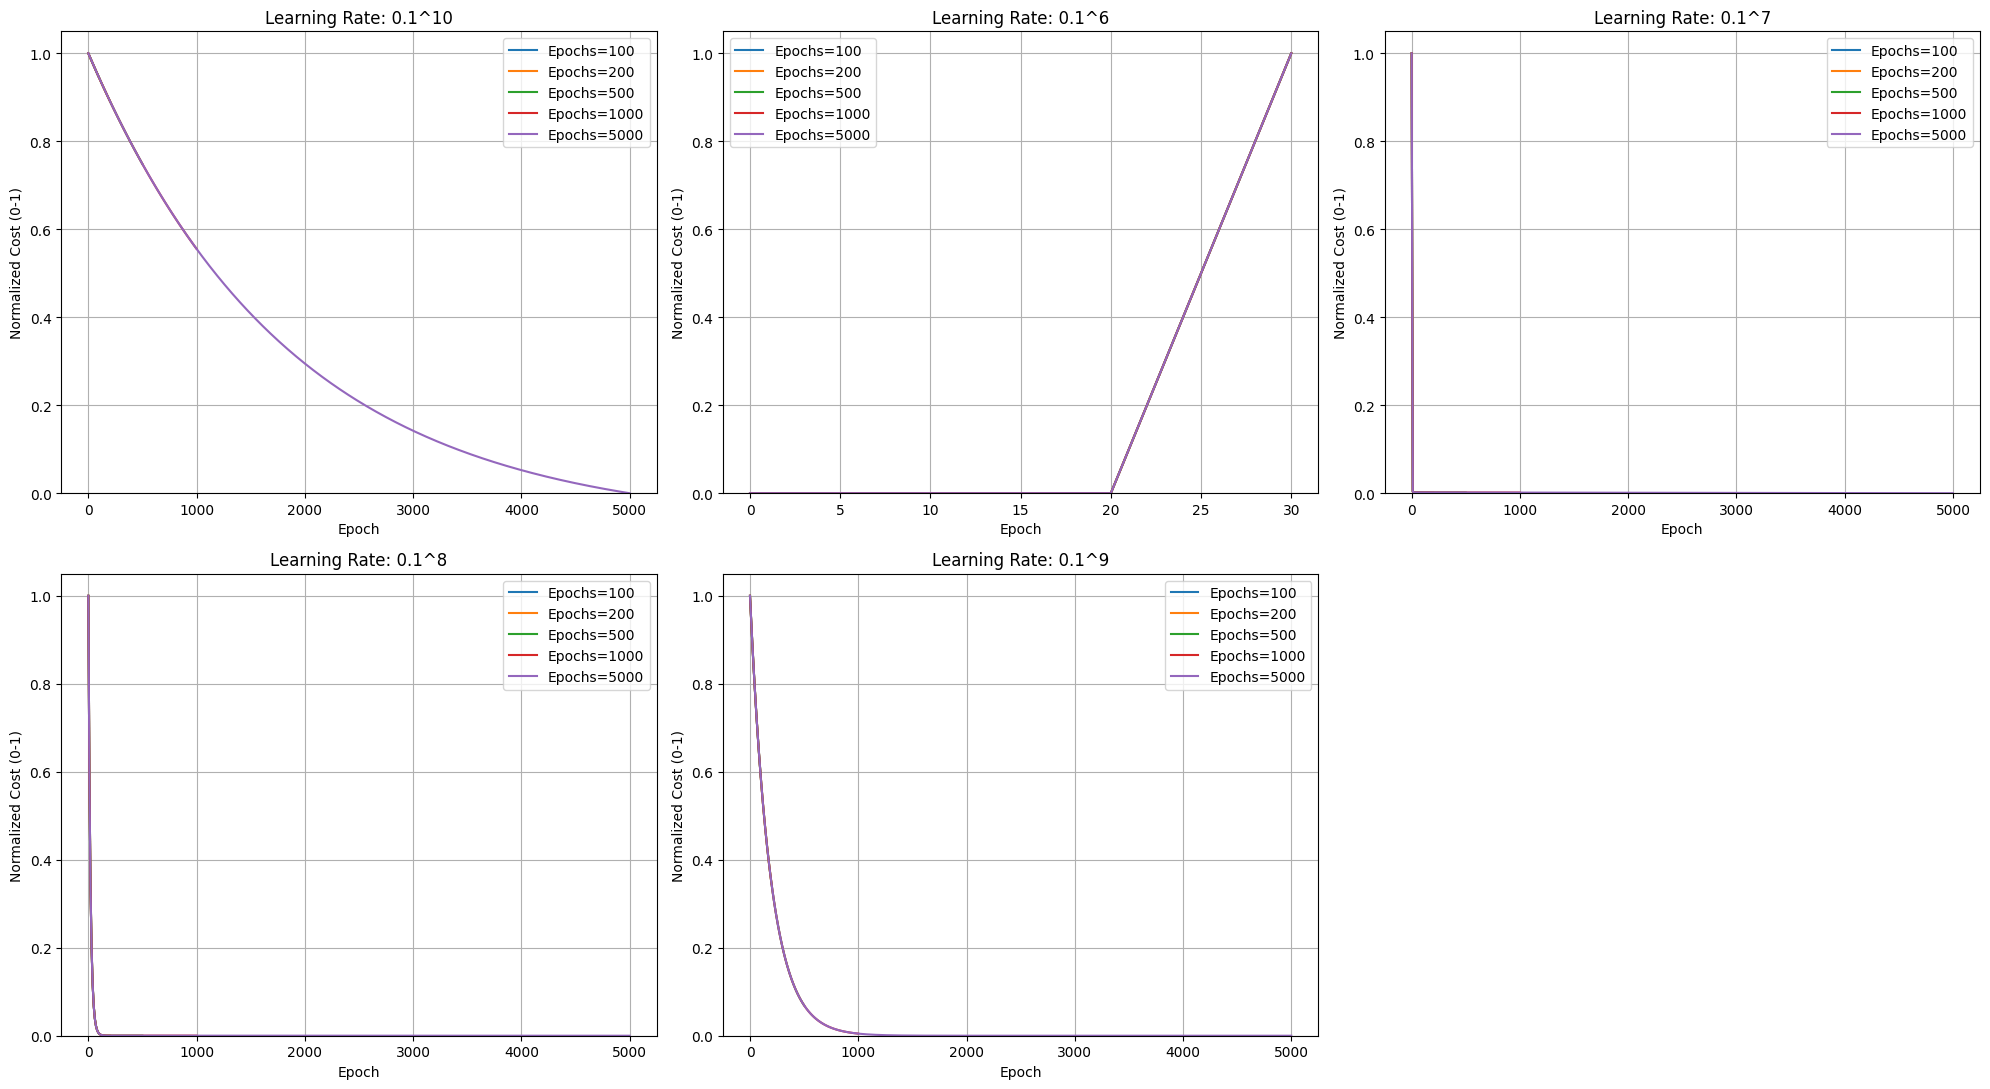

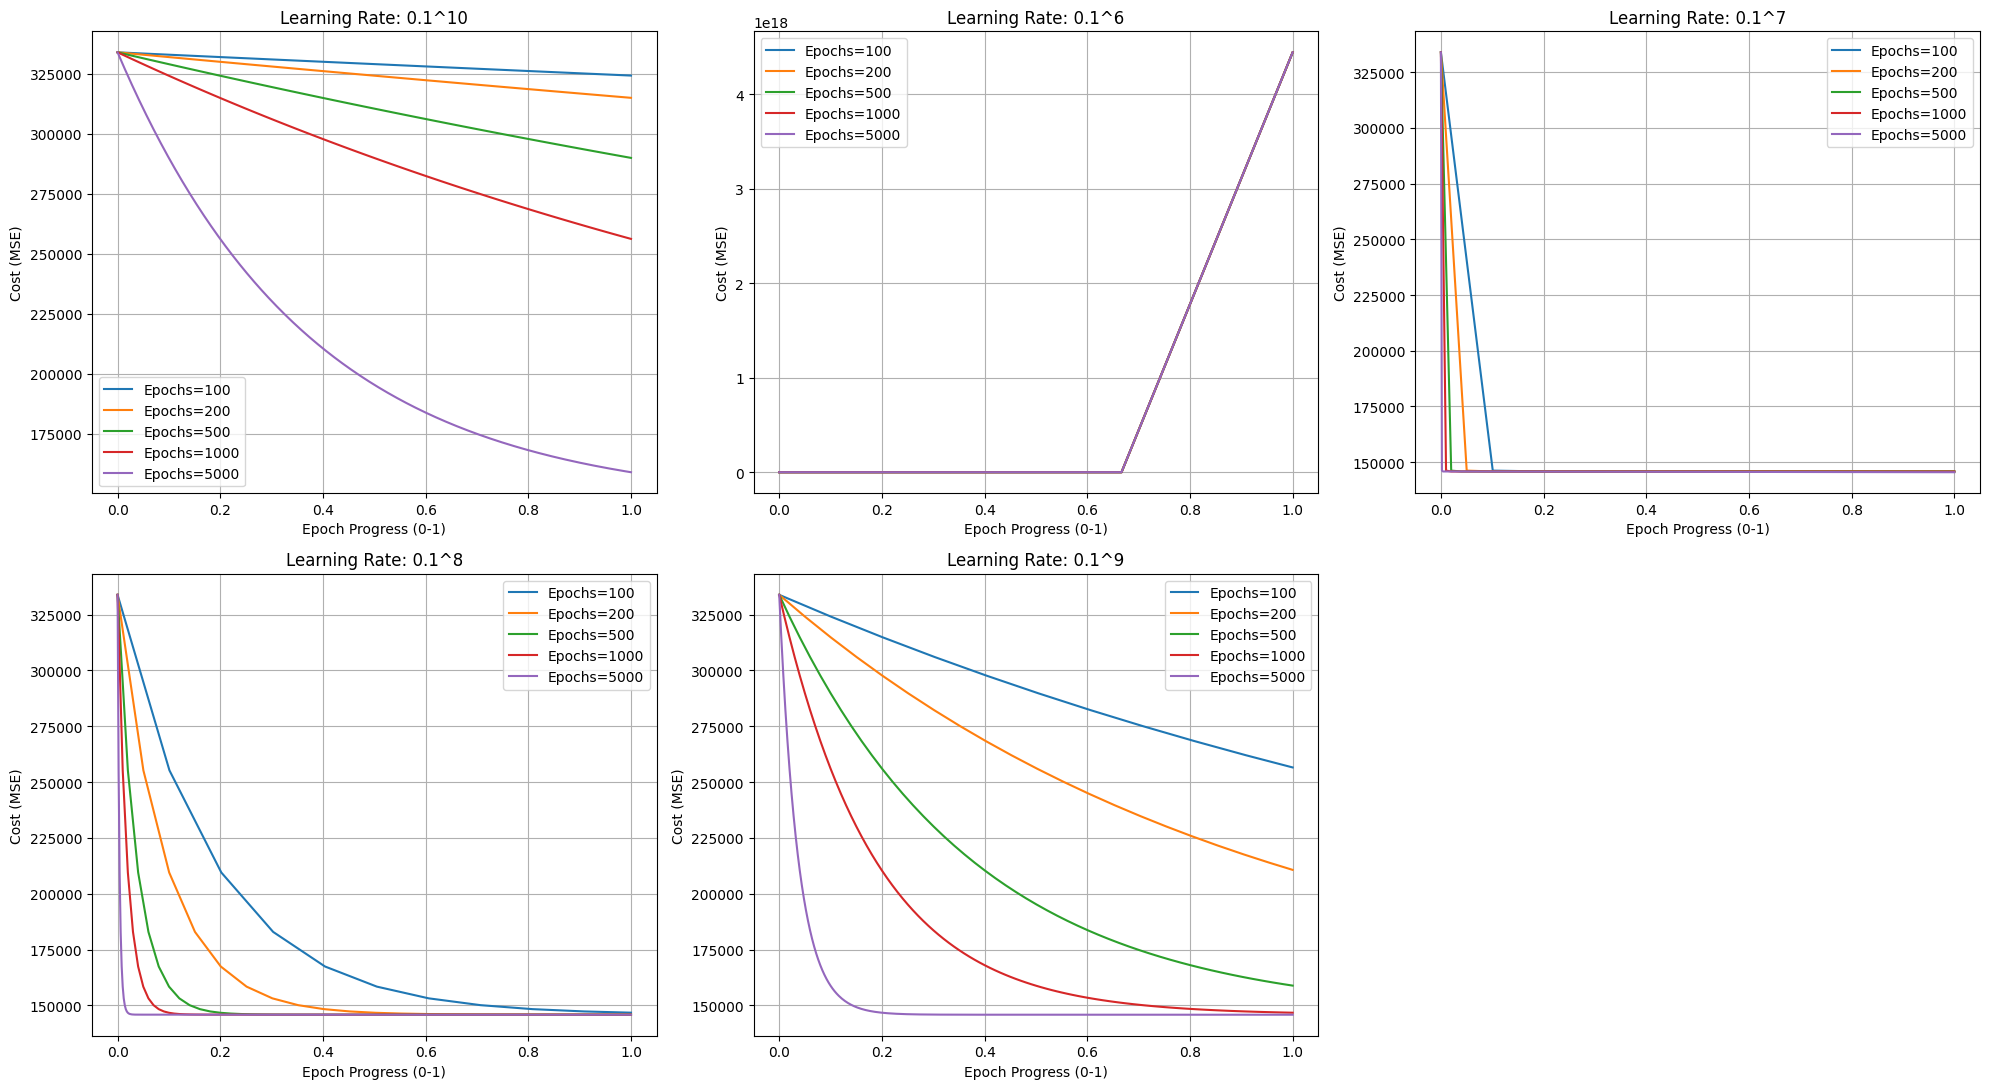

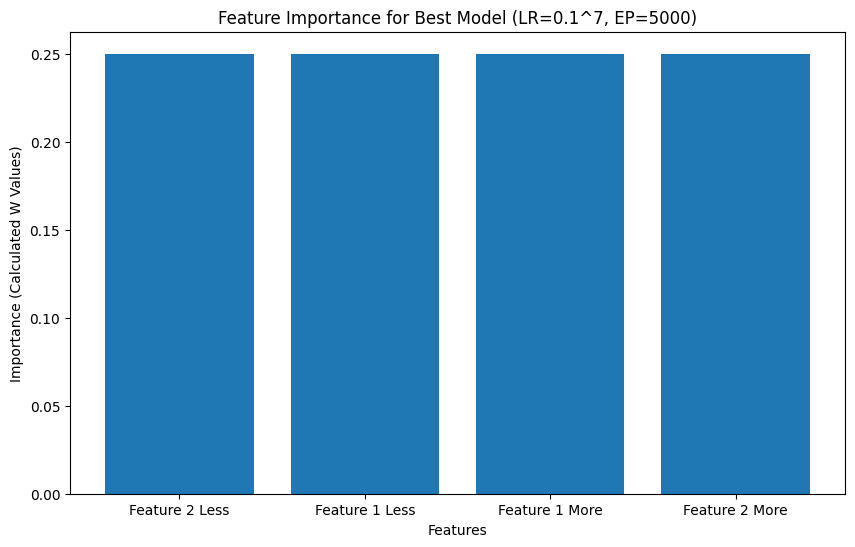

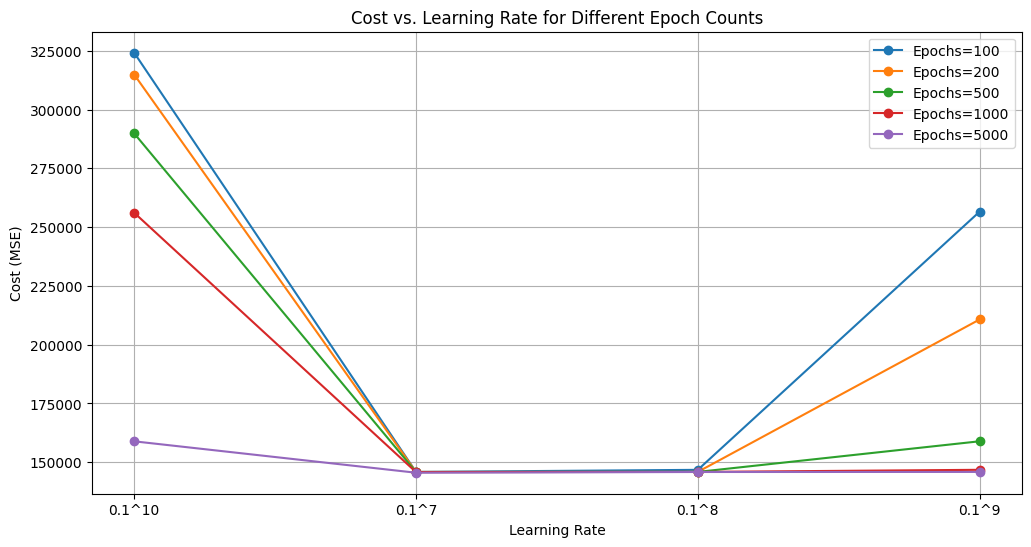

In [45]:
# Set pandas display options to always show 3 decimal places
pd.set_option('display.float_format', '{:.3f}'.format)

# Number Dataset
target_values = np.arange(1, 1001)

feature_2_less = target_values - 2
feature_1_less = target_values - 1
feature_1_more = target_values + 1
feature_2_more = target_values + 2

feature_2_less_tensor = torch.FloatTensor(feature_2_less)
feature_1_less_tensor = torch.FloatTensor(feature_1_less)
feature_1_more_tensor = torch.FloatTensor(feature_1_more)
feature_2_more_tensor = torch.FloatTensor(feature_2_more)

X_train = torch.stack([feature_2_less_tensor, feature_1_less_tensor, feature_1_more_tensor, feature_2_more_tensor])
y_train = torch.FloatTensor(target_values)
X_train_t = torch.transpose(X_train, 0, 1)

# Hyperparameters
learning_rates = [0.1 ** n for n in range(1, 11)]
num_epochs = [100, 200, 500, 1000, 5000]
# Store experiment results
experiment_results = []

# Store cost histories for plotting
cost_histories = {}

# Run experiments
for i, lr in enumerate(learning_rates):
    lr_key = f'0.1^{i+1}'
    cost_histories[lr_key] = {}
    
    for ep in num_epochs:
        print(f'> {lr_key} {ep}')
        W = torch.zeros([4, 1], requires_grad=True)
        b = torch.zeros(1, requires_grad=True)
        
        optimizer = optim.SGD([W, b], lr=lr)  # Define optimizer (stochastic gradient descent)
        
        # Track costs during training for this configuration
        epoch_costs = []
        
        for epoch in range(ep):
            hypothesis = torch.matmul(X_train_t, W) + b  # Forward pass (prediction)
            cost = torch.mean((hypothesis - y_train) ** 2)  # MSE 
            
            optimizer.zero_grad()  # Zero gradients from previous step
            cost.backward()  # Compute gradients
            optimizer.step()  # Update parameters using gradients
            
            # Save cost every 10 epochs or for the last epoch
            if epoch % 10 == 0 or epoch == ep-1:
                current_cost = cost.item()
                # Only store if cost is not NaN, infinity, or extremely large
                if (not np.isnan(current_cost) and 
                    not np.isinf(current_cost) and 
                    current_cost < 1e20):  # Exclude extremely large values
                    epoch_costs.append((epoch, current_cost))
        
        # Only store cost history if it contains meaningful data
        if len(epoch_costs) > 0:
            # Check if there's actual variation in costs (learning is happening)
            _, costs = zip(*epoch_costs)
            if np.std(costs) > 1e-10:  # Only include if there's some variation
                cost_histories[lr_key][ep] = epoch_costs
        
        # Now calculate W and b using the normal equation with pseudoinverse
        X_np = X_train_t.numpy()  # Convert tensor to numpy for normal equation
        X_bias = np.c_[np.ones((X_np.shape[0], 1)), X_np]  # Add bias term (column of ones)
        y_np = y_train.numpy()
        
        # Normal equation for W: W = (X^T X)^-1 X^T Y
        X_transpose = X_bias.T
        # Use pseudoinverse instead of inverse to handle singular matrices
        W_calculated = np.linalg.pinv(X_transpose.dot(X_bias)).dot(X_transpose).dot(y_np)
        
        # Extract the calculated W and b values
        calculated_b_value = W_calculated[0]  # Extract bias term (first element)
        calculated_w_values = W_calculated[1:]  # Extract weights (excluding bias term)
        
        # Store results if the final cost is meaningful (not NaN, not inf, not extremely large)
        final_cost = cost.item()
        if (not np.isnan(final_cost) and 
            not np.isinf(final_cost) and 
            final_cost < 1e20):
            experiment_results.append({
                'lr': lr_key,
                'ep': ep,
                'w_values': W.detach().numpy().flatten(),
                'b_value': b.detach().item(),
                'calculated_w_values': calculated_w_values,
                'calculated_b_value': calculated_b_value,
                'costs': final_cost
            })

# Convert the experiment results to a DataFrame
df = pd.DataFrame(experiment_results)

# Round all floating point values to 3 decimal places
# Apply rounding to specific columns that need it
for col in ['b_value', 'costs']:
    if col in df.columns:
        df[col] = df[col].round(3)

# Handle array columns separately
if 'w_values' in df.columns:
    df['w_values'] = df['w_values'].apply(lambda x: np.round(x, 3))
if 'calculated_w_values' in df.columns:
    df['calculated_w_values'] = df['calculated_w_values'].apply(lambda x: np.round(x, 3))

# Test data (for making predictions)
test_data = torch.FloatTensor([5000, 5001, 5003, 5004])

# Run predictions for each model and calculate the differences - FIXED VERSION
df['predictions'] = df.apply(lambda row: torch.matmul(test_data, torch.FloatTensor(row['w_values'])).item() + row['b_value'], axis=1)

# Fixed version: Calculate predictions using normal equation weights
df['calculated_predictions'] = df.apply(
    lambda row: row['calculated_b_value'] + np.dot(test_data.numpy(), row['calculated_w_values']), 
    axis=1
)

df['prediction_diff'] = abs(df['predictions'] - df['calculated_predictions'])

# Round the new prediction columns to 3 decimal places
df['predictions'] = df['predictions'].round(3)
df['calculated_predictions'] = df['calculated_predictions'].round(3)
df['prediction_diff'] = df['prediction_diff'].round(3)

# Print the DataFrame with added prediction differences
print("\nDataFrame with predictions:")
display(df)

# Count valid learning rates that have meaningful cost data
valid_lr_keys = [lr for lr in sorted(cost_histories.keys()) 
                if len(cost_histories[lr]) > 0]
num_valid_lr = len(valid_lr_keys)

if num_valid_lr > 0:
    # Create subplots only for learning rates with meaningful data
    fig, axes = plt.subplots(nrows=(num_valid_lr+2)//3, ncols=min(3, num_valid_lr), 
                            figsize=(20, 5*(num_valid_lr+2)//3))
    
    # Handle the case when there's only one subplot
    if num_valid_lr == 1:
        axes = np.array([axes])
    
    # Flatten axes array for easy indexing if multiple subplots
    if num_valid_lr > 1:
        axes = axes.flatten()
    
    # Normalize all costs to range [0,1] for better visualization
    for idx, lr_key in enumerate(valid_lr_keys):
        ax = axes[idx] if num_valid_lr > 1 else axes
        
        # For each learning rate, collect all costs across all epochs for normalization
        all_epochs = []
        all_costs = []
        
        for ep in sorted(cost_histories[lr_key].keys()):
            epochs, costs = zip(*cost_histories[lr_key][ep])
            all_epochs.extend(epochs)
            all_costs.extend(costs)
        
        if all_costs:
            # Normalize costs to [0,1] range for better visualization
            scaler = MinMaxScaler()
            # Reshape for sklearn's scaler
            all_costs_array = np.array(all_costs).reshape(-1, 1)
            scaler.fit(all_costs_array)
            
            # Plot each epoch's normalized costs
            for ep in sorted(cost_histories[lr_key].keys()):
                epochs, costs = zip(*cost_histories[lr_key][ep])
                
                # Reshape for sklearn's scaler
                costs_array = np.array(costs).reshape(-1, 1)
                normalized_costs = scaler.transform(costs_array).flatten()
                
                ax.plot(epochs, normalized_costs, label=f'Epochs={ep}')
            
            ax.set_title(f'Learning Rate: {lr_key}')
            ax.set_xlabel('Epoch')
            ax.set_ylabel('Normalized Cost (0-1)')
            ax.set_ylim(0, 1.05)  # Set y-axis from 0 to 1 with a small margin
            ax.legend()
            ax.grid(True)
    
    # Remove empty subplots if any
    for idx in range(num_valid_lr, len(axes) if num_valid_lr > 1 else 1):
        if num_valid_lr > 1:
            fig.delaxes(axes[idx])
    
    plt.tight_layout()
    plt.savefig('number_dataset_normalized_cost_subplots.png')
    plt.show()
    
    # Create a second set of plots showing original values but with normalized x-axis
    fig2, axes2 = plt.subplots(nrows=(num_valid_lr+2)//3, ncols=min(3, num_valid_lr), 
                              figsize=(20, 5*(num_valid_lr+2)//3))
    
    # Handle the case when there's only one subplot
    if num_valid_lr == 1:
        axes2 = np.array([axes2])
    
    # Flatten axes array for easy indexing if multiple subplots
    if num_valid_lr > 1:
        axes2 = axes2.flatten()
    
    for idx, lr_key in enumerate(valid_lr_keys):
        ax = axes2[idx] if num_valid_lr > 1 else axes2
        
        # For each learning rate and epoch combination, adjust x-axis to percentage of total epochs
        for ep in sorted(cost_histories[lr_key].keys()):
            epochs, costs = zip(*cost_histories[lr_key][ep])
            
            # Convert epochs to percentage of total epochs
            normalized_epochs = np.array(epochs) / max(epochs)
            
            ax.plot(normalized_epochs, costs, label=f'Epochs={ep}')
        
        ax.set_title(f'Learning Rate: {lr_key}')
        ax.set_xlabel('Epoch Progress (0-1)')
        ax.set_ylabel('Cost (MSE)')
        ax.legend()
        ax.grid(True)
    
    # Remove empty subplots if any
    for idx in range(num_valid_lr, len(axes2) if num_valid_lr > 1 else 1):
        if num_valid_lr > 1:
            fig2.delaxes(axes2[idx])
    
    plt.tight_layout()
    plt.savefig('number_dataset_progress_cost_subplots.png')
    plt.show()
    
else:
    print("No valid cost data to plot!")

# Visualize feature importance for the best model (lowest cost)
best_model_row = df.loc[df['costs'].idxmin()]

# Best model's W values (use calculated W values for visualization)
best_model_w_values = best_model_row['calculated_w_values']
features = ['Feature 2 Less', 'Feature 1 Less', 'Feature 1 More', 'Feature 2 More']

plt.figure(figsize=(10, 6))
plt.bar(features, best_model_w_values)
plt.title(f'Feature Importance for Best Model (LR={best_model_row["lr"]}, EP={best_model_row["ep"]})')
plt.xlabel('Features')
plt.ylabel('Importance (Calculated W Values)')
plt.savefig('number_dataset_feature_importance.png')
plt.show()

# Additional visualization: Compare costs across all learning rates
plt.figure(figsize=(12, 6))

# Extract unique learning rates and epochs for plotting
unique_lr = sorted(df['lr'].unique())
unique_ep = sorted(df['ep'].unique())

# Create line plots for each epoch count
for ep in unique_ep:
    costs = []
    for lr in unique_lr:
        filtered_df = df[(df['lr'] == lr) & (df['ep'] == ep)]
        if not filtered_df.empty and not np.isnan(filtered_df['costs'].values[0]):
            costs.append((lr, filtered_df['costs'].values[0]))
    
    if costs:
        lr_values, cost_values = zip(*costs)
        plt.plot([str(x) for x in lr_values], cost_values, marker='o', label=f'Epochs={ep}')

plt.title('Cost vs. Learning Rate for Different Epoch Counts')
plt.xlabel('Learning Rate')
plt.ylabel('Cost (MSE)')
plt.legend()
plt.grid(True)
plt.savefig('number_dataset_cost_vs_learning_rate.png')
plt.show()